
# Data Analysis - Outlier detection and frequency distribution

****Dataset used : Breast cancer dataset****

In [369]:
#Importing the necessary libraries for dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# **Dataset Analysis:**

Perform exploratory data analysis to identify potential outliers in numerical features. Investigate the impact of outlier handling techniques (e.g., capping, flooring,
removal) on the distribution of these features. Additionally, analyze the frequency distribution of categorical variables and variability to understand the class imbalance in dataset.

### **Requirements:**

* Use NumPy for numerical operations and array manipulation.
* Use Pandas for data manipulation and analysis.
* Use Matplotlib for data visualization.

In [370]:
#Converting the breast cancer data into a dataframe and analysing the data

bdf = pd.read_csv("breast_cancer_data.csv")
bdf.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [371]:
print("Shape of the Breast Cancer dataframe:",bdf.shape)
print("Number of columns in the Breast Cancer dataframe:",
      len(bdf.columns))
print("Number of rows in the Breast Cancer dataframe:",
      len(bdf))

Shape of the Breast Cancer dataframe: (569, 33)
Number of columns in the Breast Cancer dataframe: 33
Number of rows in the Breast Cancer dataframe: 569


In [372]:
print("Features to be analysed in the breast Cancer dataframe:")
print(np.array(bdf.columns))

Features to be analysed in the breast Cancer dataframe:
['id' 'diagnosis' 'radius_mean' 'texture_mean' 'perimeter_mean'
 'area_mean' 'smoothness_mean' 'compactness_mean' 'concavity_mean'
 'concave points_mean' 'symmetry_mean' 'fractal_dimension_mean'
 'radius_se' 'texture_se' 'perimeter_se' 'area_se' 'smoothness_se'
 'compactness_se' 'concavity_se' 'concave points_se' 'symmetry_se'
 'fractal_dimension_se' 'radius_worst' 'texture_worst' 'perimeter_worst'
 'area_worst' 'smoothness_worst' 'compactness_worst' 'concavity_worst'
 'concave points_worst' 'symmetry_worst' 'fractal_dimension_worst'
 'Unnamed: 32']


In [373]:
print("The datatype of features:")
print(bdf.dtypes)

The datatype of features:
id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          fl

In [374]:
print("Null values in each feature of the Breast Cancer dataframe:")
print(bdf.isnull().sum())

Null values in each feature of the Breast Cancer dataframe:
id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_w

1) Identify and handle outliers in at least three numerical columns of your choice.

#**Numerical columns selected:**

* Radius
* Smoothness
* Concavity

In [375]:
#Radius <Mean, se and worst>

print(bdf["radius_mean"])
print()
print(bdf["radius_se"])
print()
print(bdf["radius_worst"])

0      17.99
1      20.57
2      19.69
3      11.42
4      20.29
       ...  
564    21.56
565    20.13
566    16.60
567    20.60
568     7.76
Name: radius_mean, Length: 569, dtype: float64

0      1.0950
1      0.5435
2      0.7456
3      0.4956
4      0.7572
        ...  
564    1.1760
565    0.7655
566    0.4564
567    0.7260
568    0.3857
Name: radius_se, Length: 569, dtype: float64

0      25.380
1      24.990
2      23.570
3      14.910
4      22.540
        ...  
564    25.450
565    23.690
566    18.980
567    25.740
568     9.456
Name: radius_worst, Length: 569, dtype: float64


In [376]:
#Calculation of z-score for mean radius

from scipy.stats import zscore

radius_drop = []
z_scores = zscore(bdf['radius_mean'])
abs_z_scores = np.abs(z_scores)
real_z_scores = pd.Series([i for i in z_scores if i<-3 or i>3])
mask = (z_scores >= -3) & (z_scores <= 3)
df = bdf[~mask]
print("Z-scores of the removed rows:")
print(np.array([i for i in z_scores if i<=-3 or i>=3 ]))
print()
print("Removed rows:")
radius_drop.extend(df.index)
df.index

Z-scores of the removed rows:
[3.15048662 3.71851501 3.97128765 3.29533386 3.77531785]

Removed rows:


Index([82, 180, 212, 352, 461], dtype='int64')

In [377]:
#Calculation of z-score for Standard Error radius

z_scores = zscore(bdf['radius_se'])
abs_z_scores = np.abs(z_scores)
real_z_scores = pd.Series([i for i in z_scores if i<-3 or i>3])
mask = (z_scores >= -3) & (z_scores <= 3)
df = bdf[~mask]
print("Z-scores of the removed rows:")
print(np.array([i for i in z_scores if i<=-3 or i>=3 ]))
print()
print("Removed rows:")
radius_drop.extend(df.index)
df.index

Z-scores of the removed rows:
[3.98394688 3.21518514 8.90690934 3.2007483  3.48226668 7.73030688
 3.19713909]

Removed rows:


Index([122, 138, 212, 258, 417, 461, 503], dtype='int64')

In [378]:
#Calculation of z-score for worst radius

z_scores = zscore(bdf['radius_worst'])
abs_z_scores = np.abs(z_scores)
real_z_scores = pd.Series([i for i in z_scores if i<-3 or i>3])
mask = (z_scores >= -3) & (z_scores <= 3)
df = bdf[~mask]
print("Z-scores of the removed rows:")
print(np.array([i for i in z_scores if i<=-3 or i>=3 ]))
print()
print("Removed rows:")
radius_drop.extend(df.index)
df.index

Z-scores of the removed rows:
[3.48950841 3.05256427 3.35904641 3.49157923 4.09418939 3.00700611]

Removed rows:


Index([180, 236, 265, 352, 461, 503], dtype='int64')

In [379]:
bdf.drop(index=list(set(radius_drop)),inplace=True)
bdf.shape

(557, 33)

In [380]:
#Smoothness <Mean,SE and worst>

print(bdf["smoothness_mean"])
print()
print(bdf["smoothness_se"])
print()
print(bdf["smoothness_worst"])

0      0.11840
1      0.08474
2      0.10960
3      0.14250
4      0.10030
        ...   
564    0.11100
565    0.09780
566    0.08455
567    0.11780
568    0.05263
Name: smoothness_mean, Length: 557, dtype: float64

0      0.006399
1      0.005225
2      0.006150
3      0.009110
4      0.011490
         ...   
564    0.010300
565    0.005769
566    0.005903
567    0.006522
568    0.007189
Name: smoothness_se, Length: 557, dtype: float64

0      0.16220
1      0.12380
2      0.14440
3      0.20980
4      0.13740
        ...   
564    0.14100
565    0.11660
566    0.11390
567    0.16500
568    0.08996
Name: smoothness_worst, Length: 557, dtype: float64


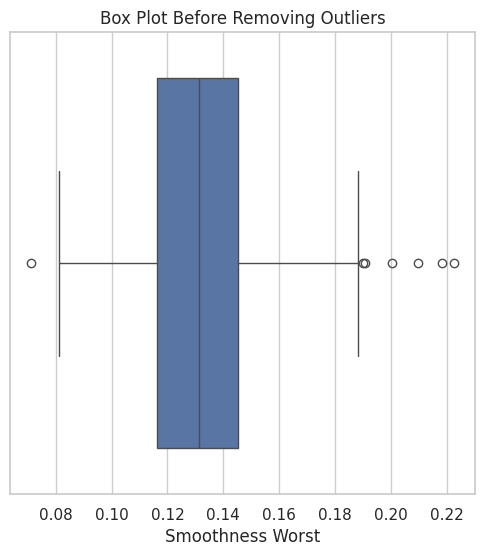

In [381]:
plt.figure(figsize=(6,6))
sns.boxplot(x=bdf['smoothness_worst'])
plt.title('Box Plot Before Removing Outliers')
plt.xlabel('Smoothness Worst')
plt.show()

In [382]:
# Calculate the IQR of smoothness_worst
Q1 = bdf['smoothness_worst'].quantile(0.25)
Q3 = bdf['smoothness_worst'].quantile(0.75)
IQR = Q3 - Q1

smooth_idx_drop = []
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

mask1 = (bdf['smoothness_worst'] < lower_bound)
mask2 = (bdf['smoothness_worst'] > upper_bound)

mask = mask1 | mask2
sdf = bdf[mask]

print("Removed rows:")
smooth_idx_drop.extend(sdf.index)
print(sdf.index)

Removed rows:
Index([3, 41, 192, 203, 379, 504, 505], dtype='int64')


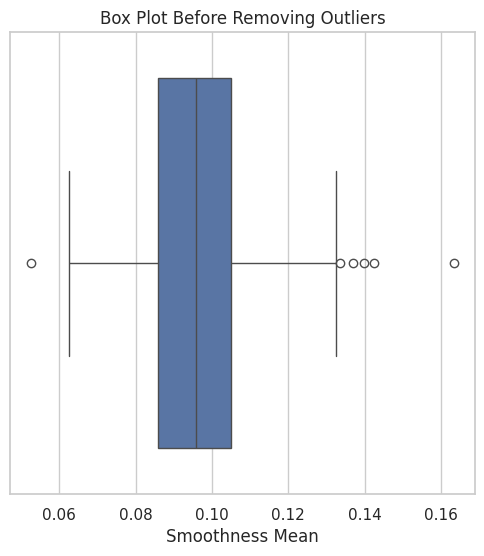

In [383]:
plt.figure(figsize=(6,6))
sns.boxplot(x=bdf['smoothness_mean'])
plt.title('Box Plot Before Removing Outliers')
plt.xlabel('Smoothness Mean')
plt.show()

In [384]:
# Calculate the IQR of smoothness_mean
Q1 = bdf['smoothness_mean'].quantile(0.25)
Q3 = bdf['smoothness_mean'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

mask1 = (bdf['smoothness_mean'] < lower_bound)
mask2 = (bdf['smoothness_mean'] > upper_bound)

mask = mask1 | mask2
sdf = bdf[mask]

print("Removed rows:")
smooth_idx_drop.extend(sdf.index)
print(sdf.index)

Removed rows:
Index([3, 105, 257, 504, 520, 568], dtype='int64')


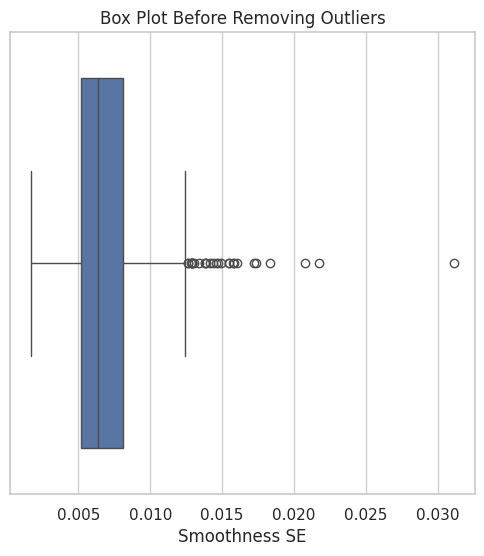

In [385]:
plt.figure(figsize=(6,6))
sns.boxplot(x=bdf['smoothness_se'])
plt.title('Box Plot Before Removing Outliers')
plt.xlabel('Smoothness SE')
plt.show()

In [386]:
# Calculate the IQR of smoothness_se
Q1 = bdf['smoothness_se'].quantile(0.25)
Q3 = bdf['smoothness_se'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

mask1 = (bdf['smoothness_se'] < lower_bound)
mask2 = (bdf['smoothness_se'] > upper_bound)

mask = mask1 | mask2
sdf = bdf[mask]

print("Removed rows:")
smooth_idx_drop.extend(sdf.index)
print(sdf.index)

Removed rows:
Index([ 71,  76, 110, 111, 116, 173, 176, 185, 196, 213, 245, 273, 275, 288,
       314, 332, 345, 391, 416, 424, 469, 505, 507, 520, 537, 538, 539, 556],
      dtype='int64')


In [387]:
print("Index of the outliers:")
print(np.array(list(set(smooth_idx_drop))))

Index of the outliers:
[257   3 391 520 273 275 537 538 539 288 416 424  41 556 173 176 568 185
 314 192 196  71 203  76 332 213 469 345 105 110 111 116 245 507 504 505
 379]


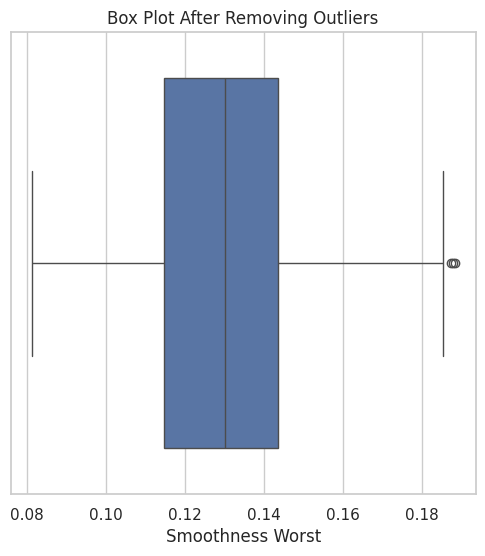

In [388]:
#Dropping the outliers
bdf.drop(index=list(set(smooth_idx_drop)),inplace=True)

plt.figure(figsize=(6,6))
sns.boxplot(x=bdf['smoothness_worst'])
plt.title('Box Plot After Removing Outliers')
plt.xlabel('Smoothness Worst')
plt.show()

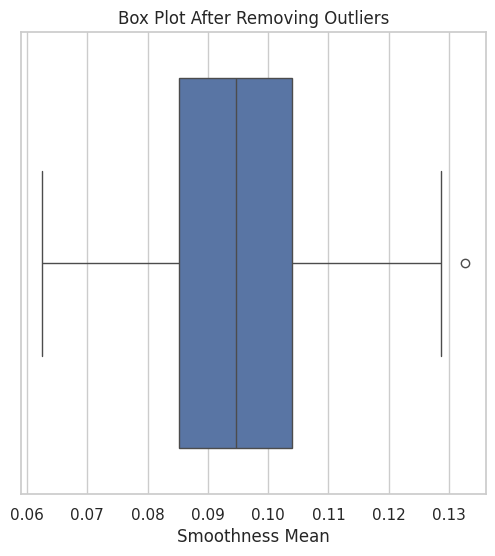

In [389]:
plt.figure(figsize=(6,6))
sns.boxplot(x=bdf['smoothness_mean'])
plt.title('Box Plot After Removing Outliers')
plt.xlabel('Smoothness Mean')
plt.show()

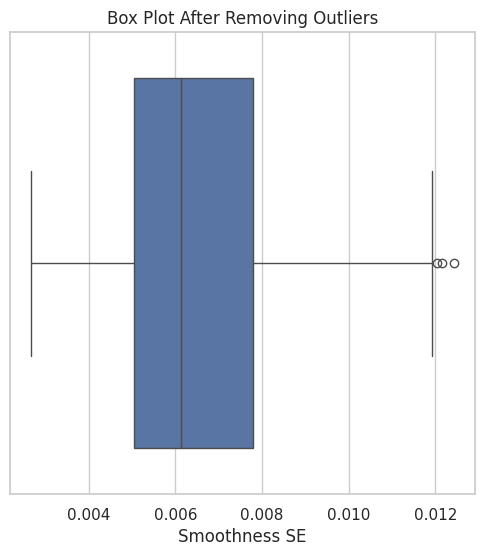

In [390]:
plt.figure(figsize=(6,6))
sns.boxplot(x=bdf['smoothness_se'])
plt.title('Box Plot After Removing Outliers')
plt.xlabel('Smoothness SE')
plt.show()

In [391]:
bdf.shape

(520, 33)

In [392]:
#Concavity <Mean,SE and worst>

print(bdf["concavity_mean"])
print()
print(bdf["concavity_se"])
print()
print(bdf["concavity_worst"])

0      0.30010
1      0.08690
2      0.19740
4      0.19800
5      0.15780
        ...   
563    0.31740
564    0.24390
565    0.14400
566    0.09251
567    0.35140
Name: concavity_mean, Length: 520, dtype: float64

0      0.05373
1      0.01860
2      0.03832
4      0.05688
5      0.03672
        ...   
563    0.07845
564    0.05198
565    0.03950
566    0.04730
567    0.07117
Name: concavity_se, Length: 520, dtype: float64

0      0.7119
1      0.2416
2      0.4504
4      0.4000
5      0.5355
        ...  
563    0.6599
564    0.4107
565    0.3215
566    0.3403
567    0.9387
Name: concavity_worst, Length: 520, dtype: float64


In [393]:
#Calculation of z-score for worst concavity

concdrop = []
z_scores = zscore(bdf['concavity_worst'])
abs_z_scores = np.abs(z_scores)
real_z_scores = pd.Series([i for i in z_scores if i<-3 or i>3])
mask = (z_scores >= -3) & (z_scores <= 3)
df = bdf[~mask]
print("Z-scores of the removed rows:")
print(np.array([i for i in z_scores if i<=-3 or i>=3 ]))
print()
print("Removed rows:")
concdrop.extend(df.index)
df.index

Z-scores of the removed rows:
[4.0460636  4.76006338 3.34566382 3.06686391 3.05957819 4.36177779
 3.238321  ]

Removed rows:


Index([9, 68, 108, 400, 430, 562, 567], dtype='int64')

In [394]:
#Calculation of z-score for mean concavity

z_scores = zscore(bdf['concavity_mean'])
abs_z_scores = np.abs(z_scores)
real_z_scores = pd.Series([i for i in z_scores if i<-3 or i>3])
mask = (z_scores >= -3) & (z_scores <= 3)
df = bdf[~mask]
print("Z-scores of the removed rows:")
print(np.array([i for i in z_scores if i<=-3 or i>=3 ]))
print()
print("Removed rows:")
concdrop.extend(df.index)
df.index

Z-scores of the removed rows:
[3.0247445  3.8549287  4.53344463 4.32589858 3.54760089 3.10323948
 3.08328313 3.53562708]

Removed rows:


Index([68, 78, 108, 152, 202, 400, 563, 567], dtype='int64')

In [395]:
#Calculation of z-score for SE concavity

z_scores = zscore(bdf['concavity_se'])
abs_z_scores = np.abs(z_scores)
real_z_scores = pd.Series([i for i in z_scores if i<-3 or i>3])
mask = (z_scores >= -3) & (z_scores <= 3)
df = bdf[~mask]
print("Z-scores of the removed rows:")
print(np.array([i for i in z_scores if i<=-3 or i>=3 ]))
print()
print("Removed rows:")
concdrop.extend(df.index)
df.index

Z-scores of the removed rows:
[ 9.21900028  3.80052248 12.33555458  4.13854355]

Removed rows:


Index([68, 112, 152, 376], dtype='int64')

In [396]:
#Dropping the outliers
bdf.drop(index=list(set(concdrop)),inplace=True)

In [397]:
bdf.shape

(507, 33)

2) Determine the frequency distribution for at least two categorical columns.

#**Categorical columns selected:**

* Diagnosis (Only one)

Frequency Distribution for diagnosis
diagnosis
B    324
M    183
Name: count, dtype: int64


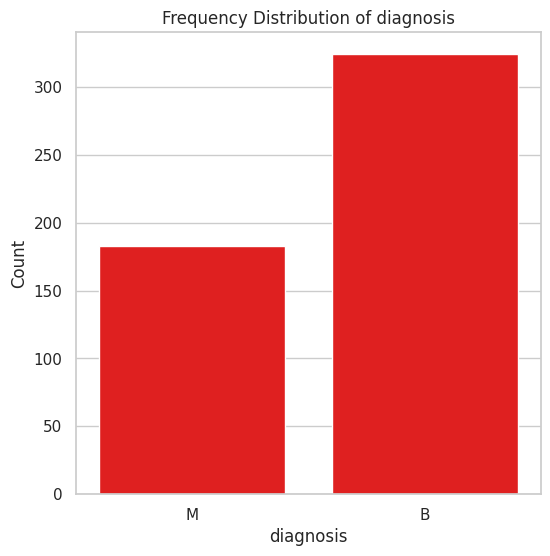

In [398]:
categorical_column_1 = 'diagnosis'

frequency_distribution_1 = bdf[categorical_column_1].value_counts()
print("Frequency Distribution for", categorical_column_1)
print(frequency_distribution_1)

plt.figure(figsize=(6,6))
sns.countplot(data=bdf, x=categorical_column_1,color='red')
plt.title(f'Frequency Distribution of {categorical_column_1}')
plt.xlabel(categorical_column_1)
plt.ylabel('Count')
plt.show()

3) Calculate the interpret the mean,median and mode for atleast three numerical columns of your choice.

#**Numerical columns selected:**

* Texture
* Symmetry
* Area



In [399]:
#Mean,median and mode for texture
numerical_columns_1 = ['texture_worst', 'texture_mean', 'texture_se']

for column in numerical_columns_1:
    mean = bdf[column].mean()
    median = bdf[column].median()
    mode = bdf[column].mode()[0]

    print(f"Column: {column}")
    print(f"Mean: {mean}")
    print(f"Median: {median}")
    print(f"Mode: {mode}")
    print()

Column: texture_worst
Mean: 25.58025641025641
Median: 25.44
Mode: 17.7

Column: texture_mean
Mean: 19.177140039447735
Median: 18.75
Mode: 14.93

Column: texture_se
Mean: 1.165689349112426
Median: 1.065
Mode: 0.8561



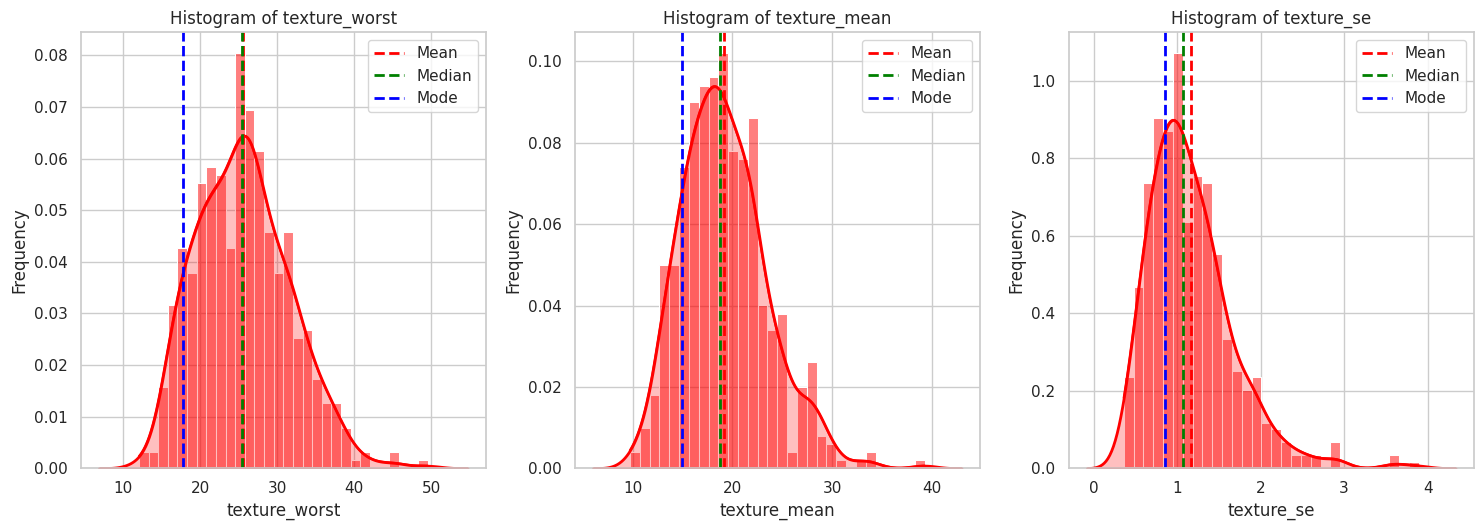

In [400]:
#Visualization of mean,mean and mode for texture

numerical_columns_1 = ['texture_worst', 'texture_mean', 'texture_se']

plt.figure(figsize=(15, 10))

for i, column in enumerate(numerical_columns_1, 1):
    plt.subplot(2, 3, i)

    # Calculate mean, median, and mode
    mean = bdf[column].mean()
    median = bdf[column].median()
    mode = bdf[column].mode()[0]

    sns.histplot(bdf[column], bins=30, kde=True,
                 color='red',stat='density')

    sns.kdeplot(bdf[column], fill=True, color='red', linewidth=2)

    plt.axvline(mean, color='red', linestyle='dashed',
                linewidth=2, label='Mean')
    plt.axvline(median, color='green', linestyle='dashed',
                linewidth=2, label='Median')
    plt.axvline(mode, color='blue', linestyle='dashed',
                linewidth=2, label='Mode')

    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()

In [401]:
#Mean,median and mode for symmetry
numerical_columns_1 = ['symmetry_worst', 'symmetry_mean', 'symmetry_se']

for column in numerical_columns_1:
    mean = bdf[column].mean()
    median = bdf[column].median()
    mode = bdf[column].mode()[0]

    print(f"Column: {column}")
    print(f"Mean: {mean}")
    print(f"Median: {median}")
    print(f"Mode: {mode}")
    print()

Column: symmetry_worst
Mean: 0.2883351084812623
Median: 0.2806
Mode: 0.2369

Column: symmetry_mean
Mean: 0.1785948717948718
Median: 0.1773
Mode: 0.1601

Column: symmetry_se
Mean: 0.019677727810650886
Median: 0.01842
Mode: 0.01344



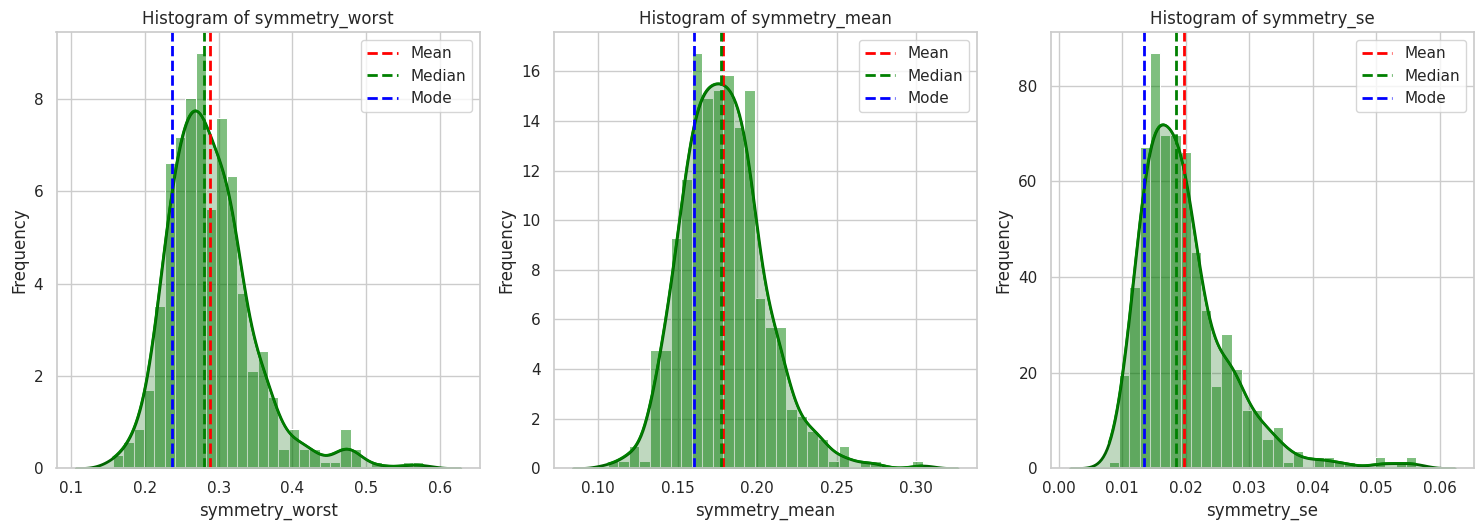

In [402]:
#Visualization of mean,mean and mode for symmetry

numerical_columns_1 = ['symmetry_worst', 'symmetry_mean', 'symmetry_se']

plt.figure(figsize=(15, 10))

for i, column in enumerate(numerical_columns_1, 1):
    plt.subplot(2, 3, i)

    # Calculate mean, median, and mode
    mean = bdf[column].mean()
    median = bdf[column].median()
    mode = bdf[column].mode()[0]

    sns.histplot(bdf[column], bins=30, kde=True,
                 color='green',stat='density')

    sns.kdeplot(bdf[column], fill=True, color='darkgreen', linewidth=2)

    plt.axvline(mean, color='red', linestyle='dashed',
                linewidth=2, label='Mean')
    plt.axvline(median, color='green', linestyle='dashed',
                linewidth=2, label='Median')
    plt.axvline(mode, color='blue', linestyle='dashed',
                linewidth=2, label='Mode')

    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()

In [403]:
#Mean,median and mode for area
numerical_columns_1 = ['area_worst', 'area_mean', 'area_se']

for column in numerical_columns_1:
    mean = bdf[column].mean()
    median = bdf[column].median()
    mode = bdf[column].mode()[0]

    print(f"Column: {column}")
    print(f"Mean: {mean}")
    print(f"Median: {median}")
    print(f"Mode: {mode}")
    print()

Column: area_worst
Mean: 863.581459566075
Median: 688.9
Mode: 439.6

Column: area_mean
Mean: 646.3187376725838
Median: 556.7
Mode: 512.2

Column: area_se
Mean: 36.522130177514796
Median: 24.2
Mode: 16.64



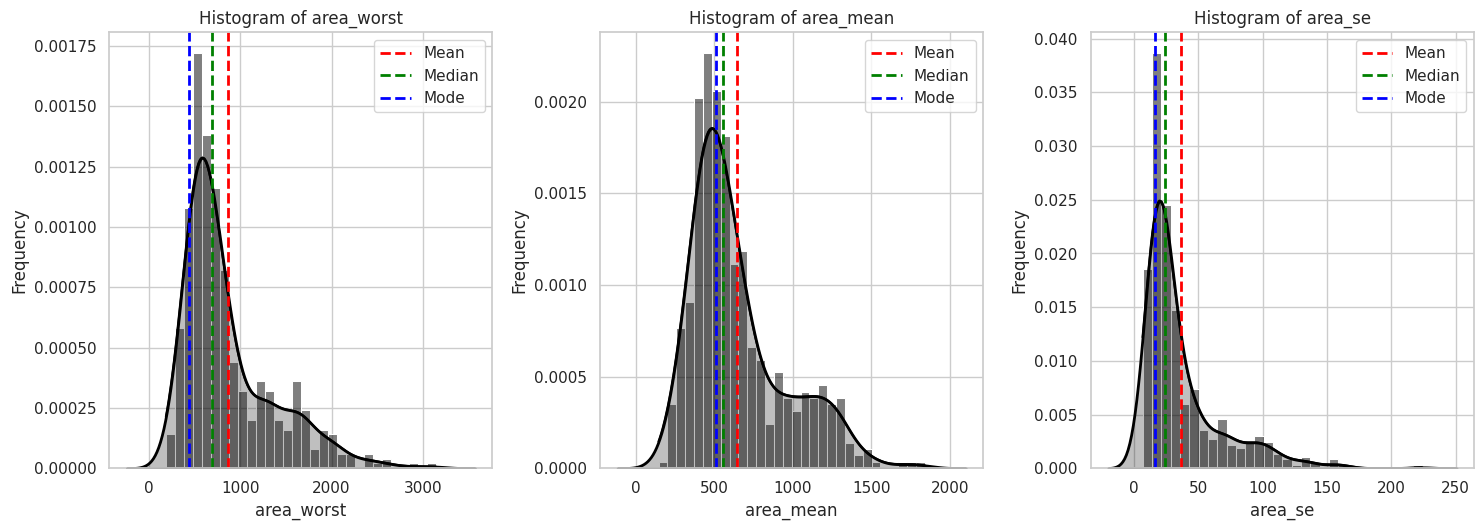

In [404]:
#Visualization of mean,mean and mode for area

numerical_columns_1 = ['area_worst', 'area_mean', 'area_se']

plt.figure(figsize=(15, 10))

for i, column in enumerate(numerical_columns_1, 1):
    plt.subplot(2, 3, i)

    # Calculate mean, median, and mode
    mean = bdf[column].mean()
    median = bdf[column].median()
    mode = bdf[column].mode()[0]

    sns.histplot(bdf[column], bins=30, kde=True,
                 color='black',stat='density')

    sns.kdeplot(bdf[column], fill=True, color='black', linewidth=2)

    plt.axvline(mean, color='red', linestyle='dashed',
                linewidth=2, label='Mean')
    plt.axvline(median, color='green', linestyle='dashed',
                linewidth=2, label='Median')
    plt.axvline(mode, color='blue', linestyle='dashed',
                linewidth=2, label='Mode')

    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()

4) Measure and analyse the variability of atleast three numerical columns of your choice using standard deviation and interquartile range.

#**Numerical columns selected:**

* Fractal dimension
* Concave points
* Perimeter

In [405]:
import warnings

warnings.filterwarnings('ignore')

In [406]:
#Variability analysis of fractal dimension

numerical_columns_1 = ['fractal_dimension_worst',
                       'fractal_dimension_mean',
                     'fractal_dimension_se']

variability_results = pd.DataFrame(columns=['Column',
                                            'Standard Deviation',
                                            'IQR'])

for column in numerical_columns_1:
    std_dev = bdf[column].std()
    Q1 = bdf[column].quantile(0.25)
    Q3 = bdf[column].quantile(0.75)
    IQR = Q3 - Q1

    variability_results = pd.concat([variability_results, pd.DataFrame({
        'Column': [column],
        'Standard Deviation': [std_dev],
        'IQR': [IQR]
    })], ignore_index=True)

print(variability_results)

                    Column  Standard Deviation       IQR
0  fractal_dimension_worst            0.015802  0.019755
1   fractal_dimension_mean            0.005846  0.007740
2     fractal_dimension_se            0.002005  0.001988


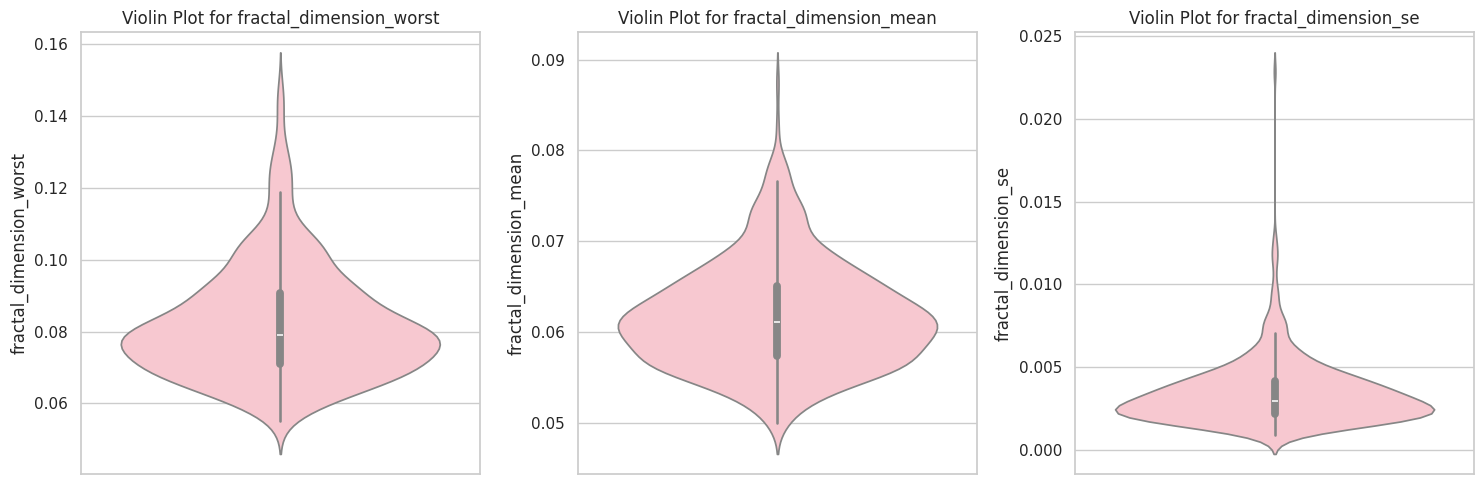

In [407]:
#Visualization of variability analysis for fractal dimension

plt.figure(figsize=(15, 5))

for i, column in enumerate(numerical_columns_1, 1):
    plt.subplot(1, 3, i)
    sns.violinplot(y=bdf[column],color='pink')
    plt.title(f'Violin Plot for {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

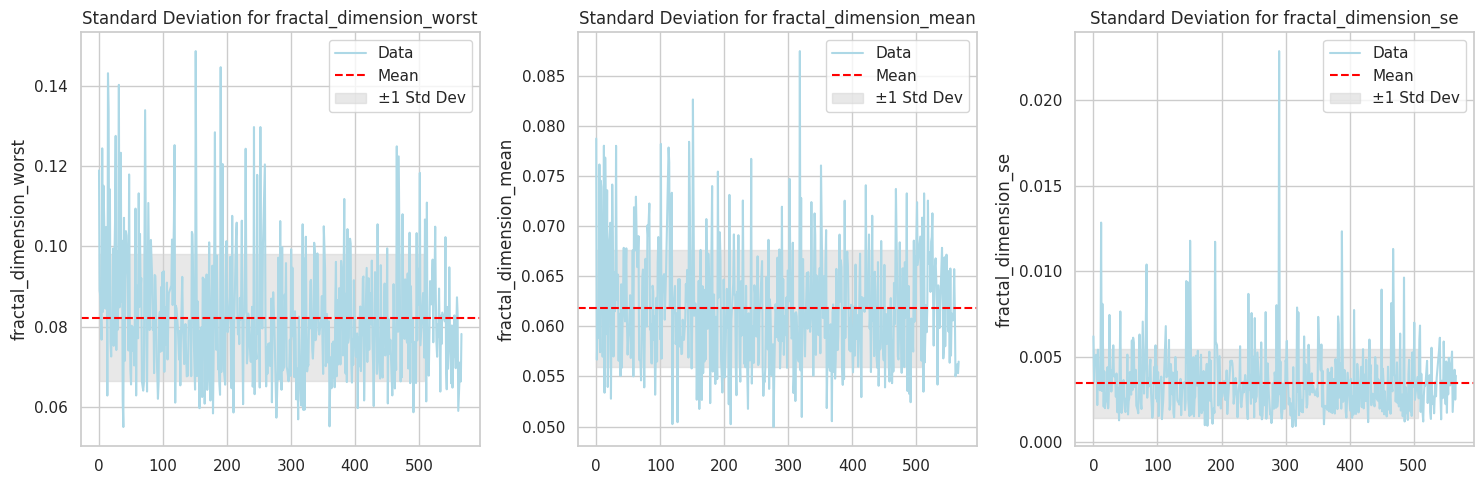

In [408]:
plt.figure(figsize=(15, 5))

for i, column in enumerate(numerical_columns_1, 1):
    mean = bdf[column].mean()
    std_dev = bdf[column].std()

    plt.subplot(1, 3, i)
    sns.lineplot(data=bdf[column], label='Data', color='lightblue')
    plt.axhline(mean, color='red', linestyle='--', label='Mean')
    plt.fill_betweenx(y=[mean - std_dev, mean + std_dev],
                      x1=0, x2=len(bdf[column]),
                      color='lightgrey', alpha=0.5, label='±1 Std Dev')

    plt.title(f'Standard Deviation for {column}')
    plt.ylabel(column)
    plt.legend()

plt.tight_layout()
plt.show()

In [409]:
#Variability analysis of concave points

numerical_columns_2 = ['concave points_worst',
                       'concave points_mean',
                     'concave points_se']

variability_results = pd.DataFrame(columns=['Column',
                                            'Standard Deviation',
                                            'IQR'])

for column in numerical_columns_2:
    std_dev = bdf[column].std()
    Q1 = bdf[column].quantile(0.25)
    Q3 = bdf[column].quantile(0.75)
    IQR = Q3 - Q1

    variability_results = pd.concat([variability_results, pd.DataFrame({
        'Column': [column],
        'Standard Deviation': [std_dev],
        'IQR': [IQR]
    })], ignore_index=True)

print(variability_results)

                 Column  Standard Deviation       IQR
0  concave points_worst            0.060906  0.091215
1   concave points_mean            0.034561  0.046155
2     concave points_se            0.005195  0.006369


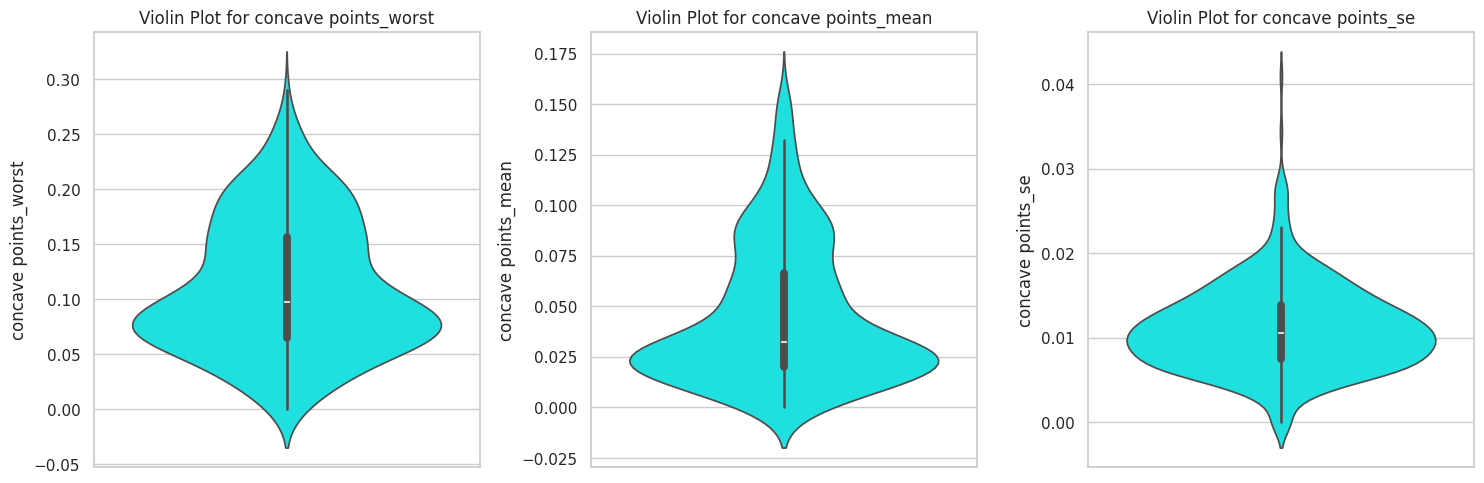

In [410]:
#Visualization of variability analysis for concave points

plt.figure(figsize=(15, 5))

for i, column in enumerate(numerical_columns_2, 1):
    plt.subplot(1, 3, i)
    sns.violinplot(y=bdf[column],color='cyan')
    plt.title(f'Violin Plot for {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

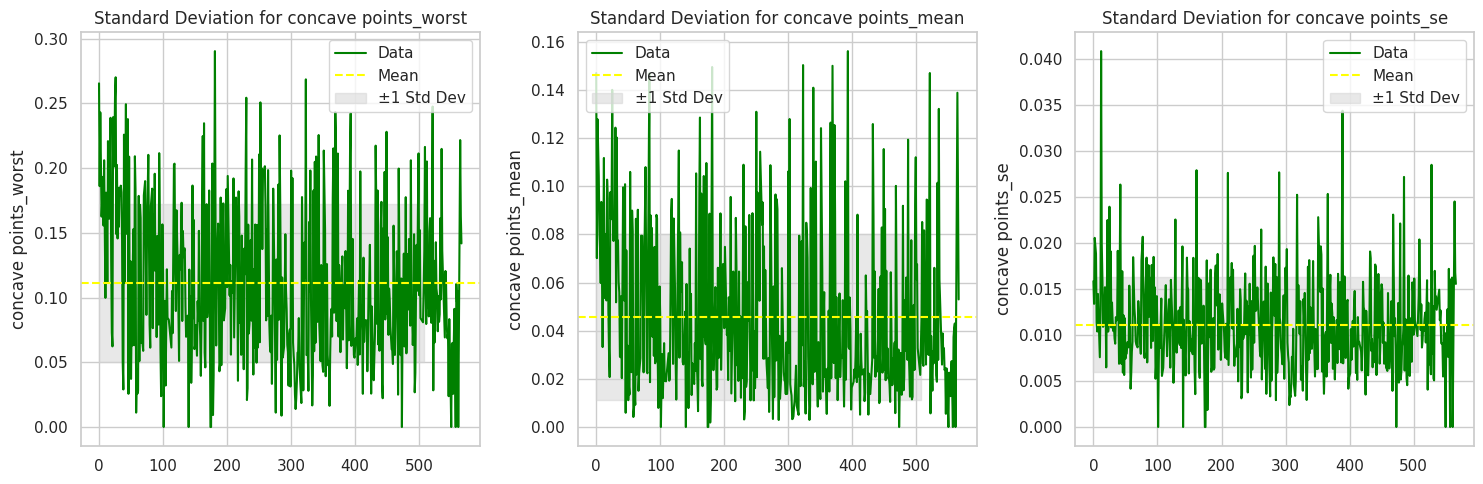

In [411]:
plt.figure(figsize=(15, 5))

for i, column in enumerate(numerical_columns_2, 1):
    mean = bdf[column].mean()
    std_dev = bdf[column].std()

    plt.subplot(1, 3, i)
    sns.lineplot(data=bdf[column], label='Data', color='green')
    plt.axhline(mean, color='yellow', linestyle='--', label='Mean')
    plt.fill_betweenx(y=[mean - std_dev, mean + std_dev],
                      x1=0, x2=len(bdf[column]),
                      color='lightgrey', alpha=0.5, label='±1 Std Dev')

    plt.title(f'Standard Deviation for {column}')
    plt.ylabel(column)
    plt.legend()

plt.tight_layout()
plt.show()

In [412]:
#Variability analysis of perimeter

numerical_columns_3 = ['perimeter_worst',
                       'perimeter_mean',
                     'perimeter_se']

variability_results = pd.DataFrame(columns=['Column',
                                            'Standard Deviation',
                                            'IQR'])

for column in numerical_columns_2:
    std_dev = bdf[column].std()
    Q1 = bdf[column].quantile(0.25)
    Q3 = bdf[column].quantile(0.75)
    IQR = Q3 - Q1

    variability_results = pd.concat([variability_results, pd.DataFrame({
        'Column': [column],
        'Standard Deviation': [std_dev],
        'IQR': [IQR]
    })], ignore_index=True)

print(variability_results)

                 Column  Standard Deviation       IQR
0  concave points_worst            0.060906  0.091215
1   concave points_mean            0.034561  0.046155
2     concave points_se            0.005195  0.006369


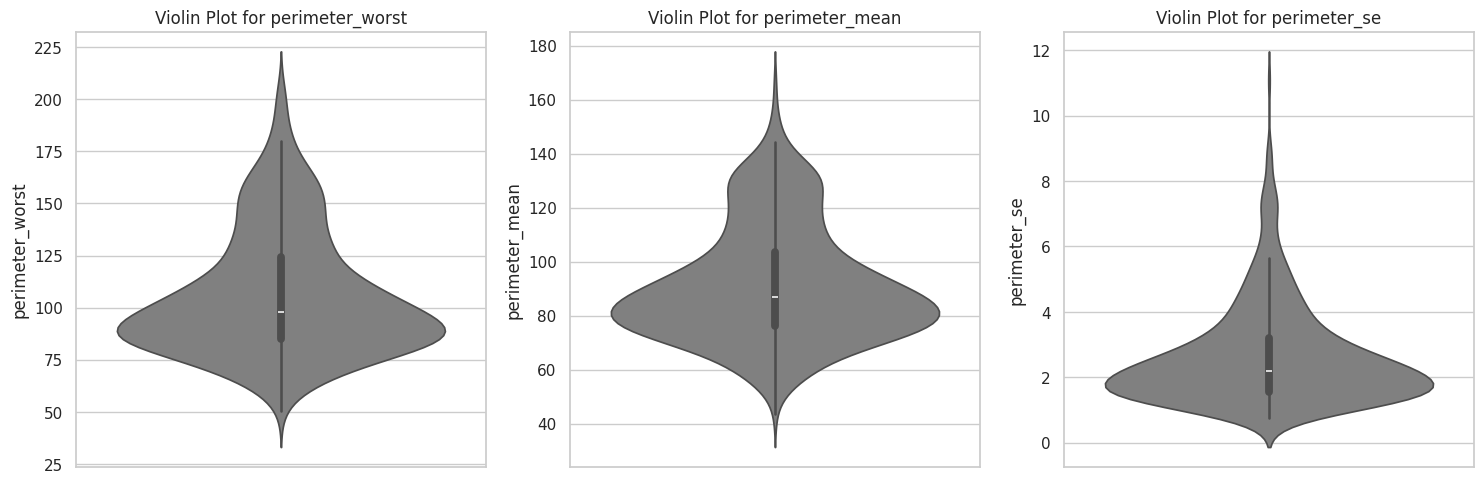

In [413]:
#Visualization of variability analysis for perimeter

plt.figure(figsize=(15, 5))

for i, column in enumerate(numerical_columns_3, 1):
    plt.subplot(1, 3, i)
    sns.violinplot(y=bdf[column],color='grey')
    plt.title(f'Violin Plot for {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

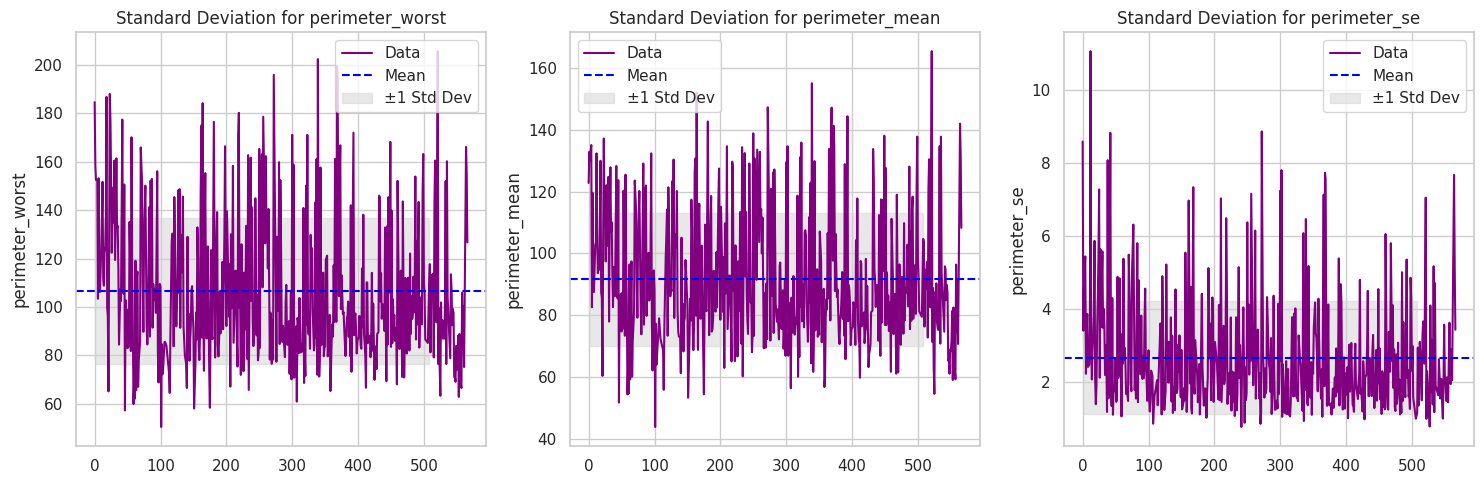

In [414]:
plt.figure(figsize=(15, 5))

for i, column in enumerate(numerical_columns_3, 1):
    mean = bdf[column].mean()
    std_dev = bdf[column].std()

    plt.subplot(1, 3, i)
    sns.lineplot(data=bdf[column], label='Data', color='purple')
    plt.axhline(mean, color='blue', linestyle='--', label='Mean')
    plt.fill_betweenx(y=[mean - std_dev, mean + std_dev],
                      x1=0, x2=len(bdf[column]),
                      color='lightgrey', alpha=0.5, label='±1 Std Dev')

    plt.title(f'Standard Deviation for {column}')
    plt.ylabel(column)
    plt.legend()

plt.tight_layout()
plt.show()

5) Insights and Conclusions:

* Visualize the distribution of numerical data by plotting scatter or box plots
* Explore relationships between variables through correlation matrices and scatter plots
* Give the summary chart

In [415]:
#Dropping the non numerical columns and construct the correlation matrix
bdf.drop('diagnosis', axis=1, inplace=True)
corr = bdf.corr()
print("Correlation matrix:")
print(corr)
corr.shape

Correlation matrix:
                               id  radius_mean  texture_mean  perimeter_mean  \
id                       1.000000     0.013199      0.069052        0.010602   
radius_mean              0.013199     1.000000      0.309414        0.998097   
texture_mean             0.069052     0.309414      1.000000        0.314206   
perimeter_mean           0.010602     0.998097      0.314206        1.000000   
area_mean                0.024664     0.992001      0.309979        0.990300   
smoothness_mean         -0.022629     0.171697     -0.018993        0.206271   
compactness_mean        -0.022573     0.526919      0.219764        0.574648   
concavity_mean           0.006751     0.710611      0.298888        0.746203   
concave points_mean      0.006391     0.824322      0.275288        0.850811   
symmetry_mean           -0.001959     0.172999      0.056266        0.203474   
fractal_dimension_mean  -0.026925    -0.307550     -0.083053       -0.259618   
radius_se           

(32, 32)

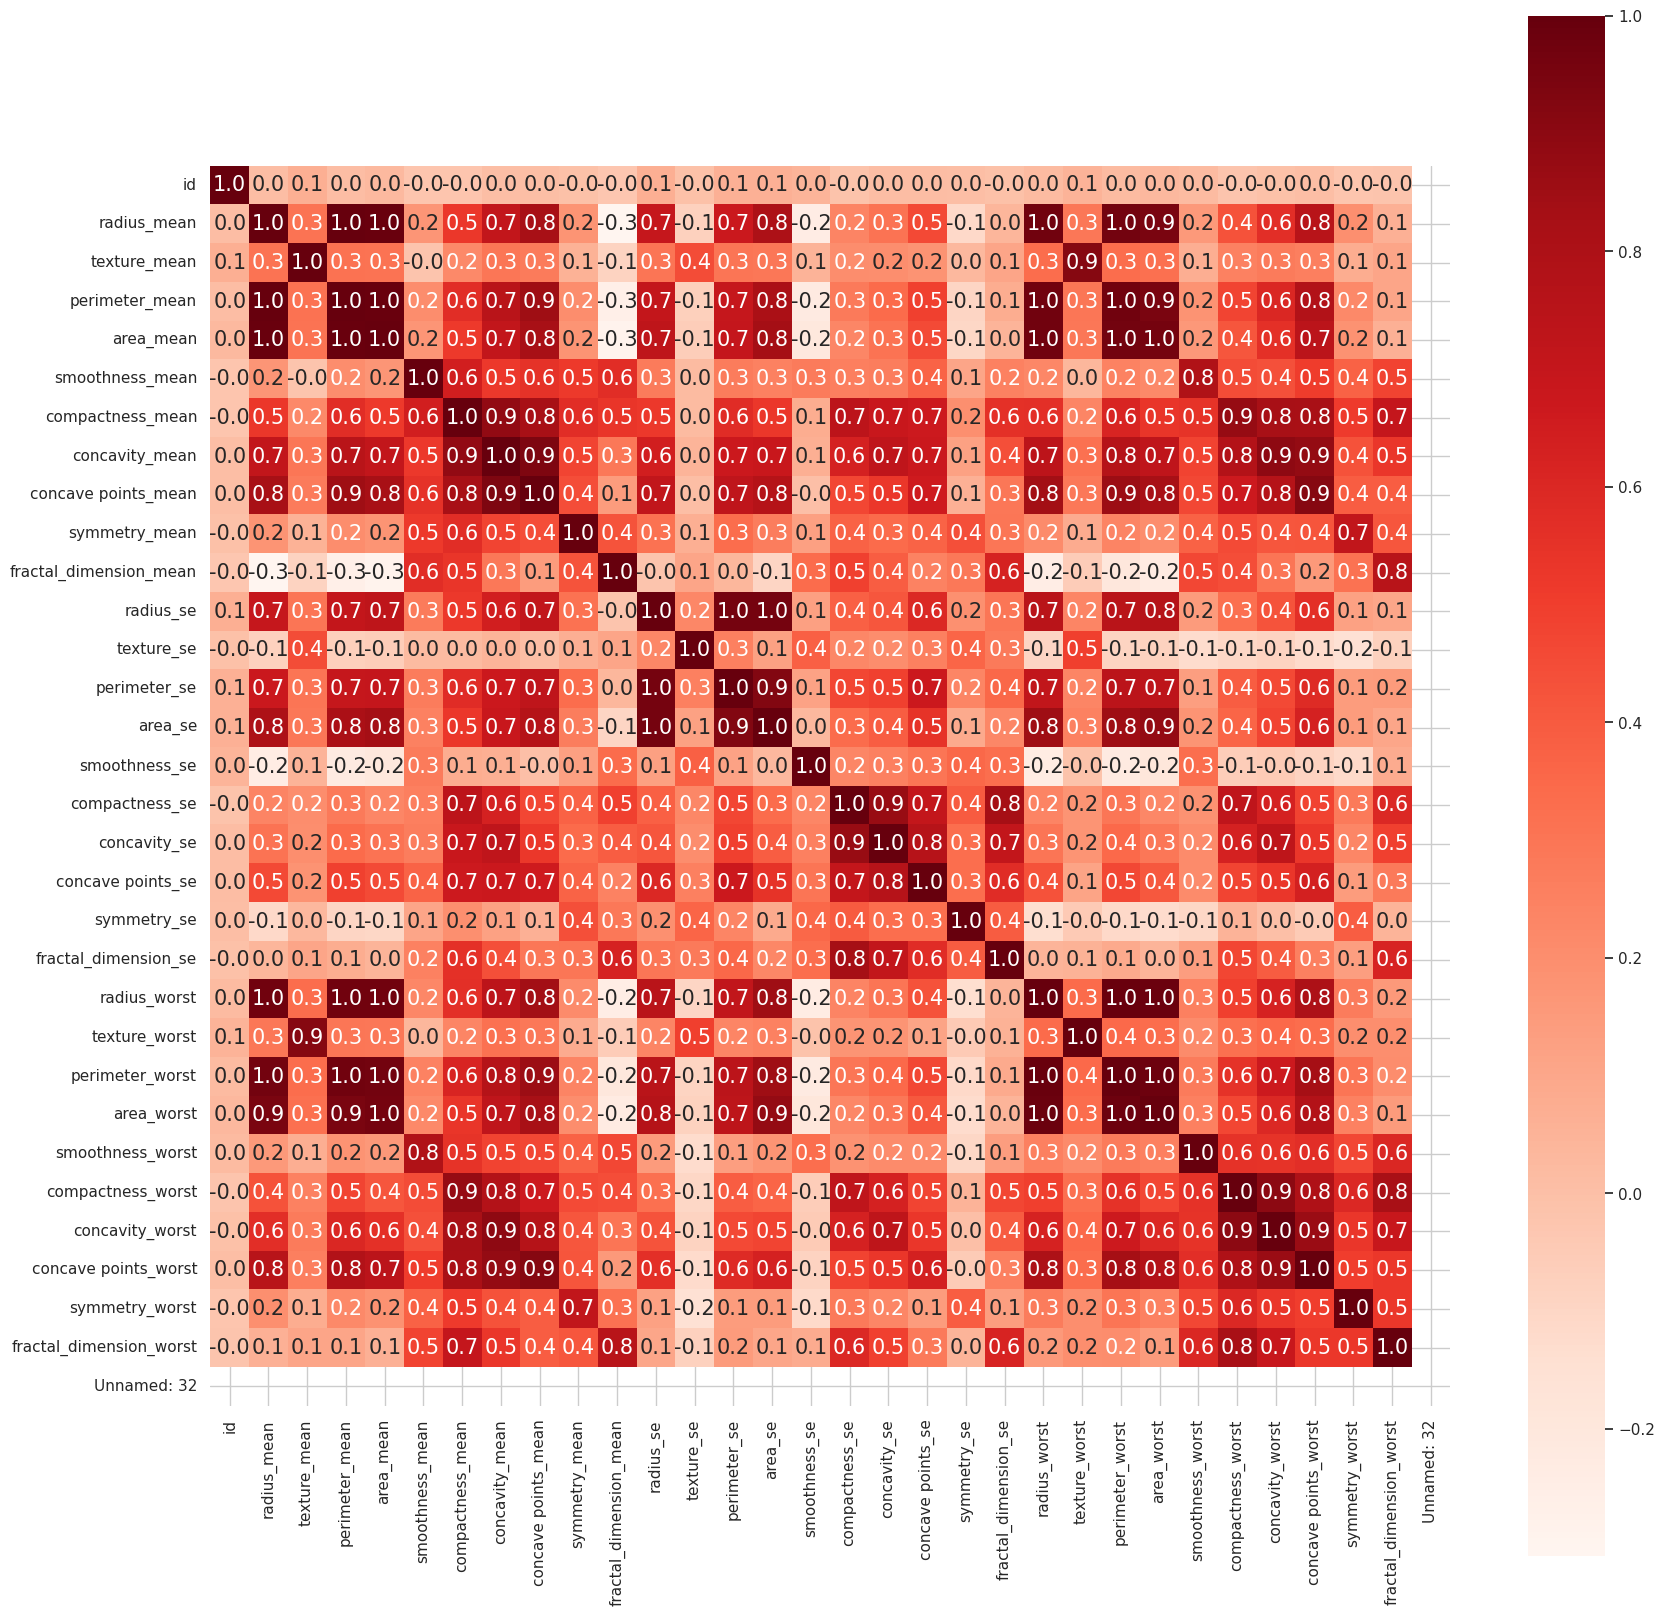

In [416]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True,
            annot_kws={'size':15}, cmap='Reds')
plt.show()

<Figure size 1200x600 with 0 Axes>

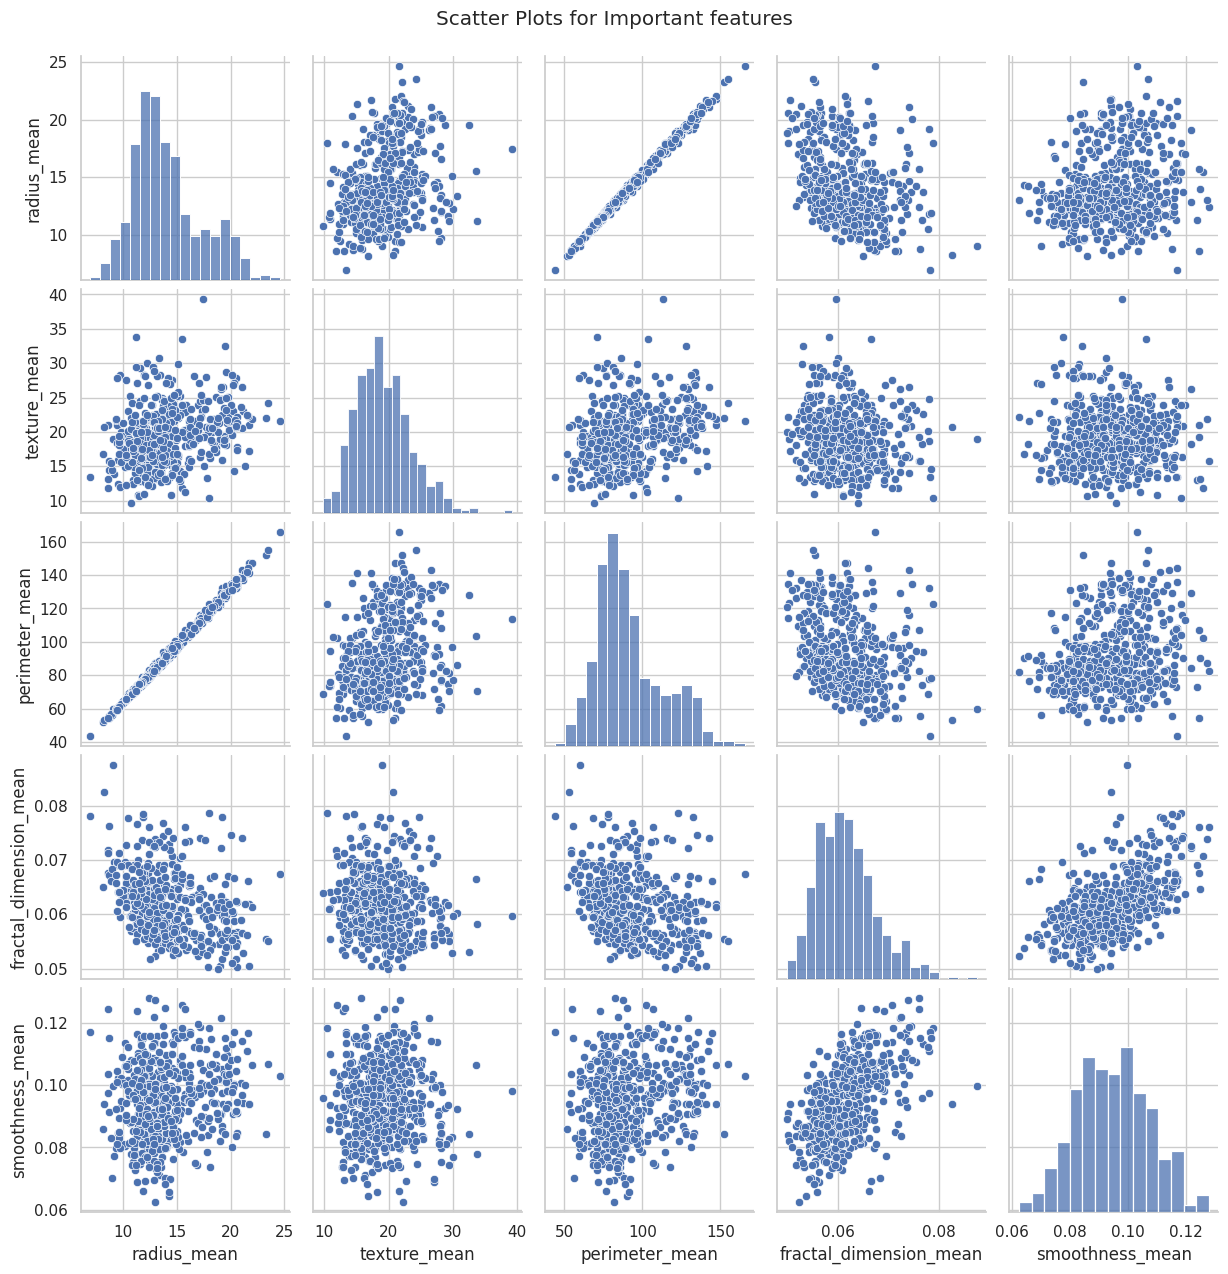

In [417]:
plt.figure(figsize=(12, 6))
sns.pairplot(bdf[['radius_mean', 'texture_mean', 'perimeter_mean',
                  'fractal_dimension_mean', 'smoothness_mean']])
plt.suptitle('Scatter Plots for Important features', y=1.02)
plt.show()

In [418]:
#Summary chart
print("Summary Statistics:\n")
bdf.describe()

Summary Statistics:



,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.070000e+02,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,...,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,0.0
mean,2.910468e+07,14.116925,19.177140,91.680138,646.318738,0.094763,0.098210,0.079660,0.045724,0.178595,...,25.580256,106.562604,863.581460,0.130247,0.243215,0.256176,0.111230,0.288335,0.082294,NaN
std,1.202030e+08,3.146807,4.276217,21.552754,302.132793,0.012461,0.045454,0.065366,0.034561,0.025451,...,6.000455,29.995302,495.975292,0.020841,0.140745,0.180572,0.060906,0.058339,0.015802,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.062510,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.081250,0.034320,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.689350e+05,11.880000,16.110000,76.350000,432.450000,0.085130,0.062985,0.028860,0.020220,0.161350,...,21.045000,85.070000,527.500000,0.114550,0.146600,0.115450,0.064985,0.249400,0.070850,NaN
50%,9.056860e+05,13.440000,18.750000,86.870000,556.700000,0.094400,0.087990,0.057860,0.032210,0.177300,...,25.440000,97.960000,688.900000,0.129800,0.207400,0.222000,0.097830,0.280600,0.079000,NaN
75%,8.910375e+06,15.780000,21.640000,103.750000,781.800000,0.103550,0.126450,0.116150,0.066375,0.193250,...,29.370000,124.200000,1047.000000,0.143150,0.316900,0.368350,0.156200,0.317150,0.090605,NaN
max,9.113205e+08,24.630000,39.280000,165.500000,1841.000000,0.127800,0.283200,0.300100,0.156200,0.304000,...,49.540000,205.700000,3143.000000,0.188300,0.932700,0.848900,0.290300,0.577400,0.148600,NaN


**Inferences:**

* Redundant features such as area and concave points can be removed.
* The columns worst,se and mean can be replaced with only one column, by their mean maybe.
* All data are normally distibuted in best,worst,mean and se cases.
* The target variable is diagnosis, and the unnamed column can be dropped.